<a href="https://colab.research.google.com/github/ujwal0127/CodeAlpha_Projects/blob/main/credit_scoring_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Credit Risk Benchmark Dataset.csv')
print(df)

       rev_util   age  late_30_59  debt_ratio  monthly_inc  open_credit  \
0      0.006999  38.0         0.0    0.302150       5440.0          4.0   
1      0.704592  63.0         0.0    0.471441       8000.0          9.0   
2      0.063113  57.0         0.0    0.068586       5000.0         17.0   
3      0.368397  68.0         0.0    0.296273       6250.0         16.0   
4      1.000000  34.0         1.0    0.000000       3500.0          0.0   
...         ...   ...         ...         ...          ...          ...   
16709  1.000000  46.0         0.0  170.398010        401.0          3.0   
16710  1.135552  41.0         2.0    0.845887       7500.0         12.0   
16711  0.920107  31.0         1.0    0.176732       1125.0          4.0   
16712  0.983825  55.0         0.0    0.064116       4600.0          2.0   
16713  0.224711  55.0         0.0    0.057235       8700.0          7.0   

       late_90  real_estate  late_60_89  dependents  dlq_2yrs  
0          0.0          1.0        

In [ ]:
df.head()

,rev_util,age,late_30_59,debt_ratio,monthly_inc,open_credit,late_90,real_estate,late_60_89,dependents,dlq_2yrs
0,0.006999,38.0,0.0,0.302150,5440.0,4.0,0.0,1.0,0.0,3.0,0
1,0.704592,63.0,0.0,0.471441,8000.0,9.0,0.0,1.0,0.0,0.0,0
2,0.063113,57.0,0.0,0.068586,5000.0,17.0,0.0,0.0,0.0,0.0,0
3,0.368397,68.0,0.0,0.296273,6250.0,16.0,0.0,2.0,0.0,0.0,0
4,1.000000,34.0,1.0,0.000000,3500.0,0.0,0.0,0.0,0.0,1.0,0


In [ ]:
df.isnull().sum()

,0
rev_util,0
age,0
late_30_59,0
debt_ratio,0
monthly_inc,0
open_credit,0
late_90,0
real_estate,0
late_60_89,0
dependents,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [ ]:
print(df.columns)

Index(['rev_util', 'age', 'late_30_59', 'debt_ratio', 'monthly_inc',
       'open_credit', 'late_90', 'real_estate', 'late_60_89', 'dependents',
       'dlq_2yrs'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = df.drop('dlq_2yrs', axis=1)
y = df['dlq_2yrs']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)
y_prob = lr.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Logistic Regression
Accuracy: 0.7218067603948549
Precision: 0.7775280898876404
Recall: 0.6211849192100538
F1: 0.6906187624750499
ROC-AUC: 0.7931176787243119


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:, 1]

print("Decision Tree ROC-AUC:", roc_auc_score(y_test, y_prob))


Decision Tree ROC-AUC: 0.8412167240772079


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_prob))


Random Forest ROC-AUC: 0.8526093520483107


In [ ]:
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)
y_prob = svm.predict_proba(X_test_scaled)[:, 1]

print("SVM ROC-AUC:", roc_auc_score(y_test, y_prob))


SVM ROC-AUC: 0.8115051583586026


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
y_prob = knn.predict_proba(X_test_scaled)[:, 1]

print("KNN ROC-AUC:", roc_auc_score(y_test, y_prob))


KNN ROC-AUC: 0.6880198803684583


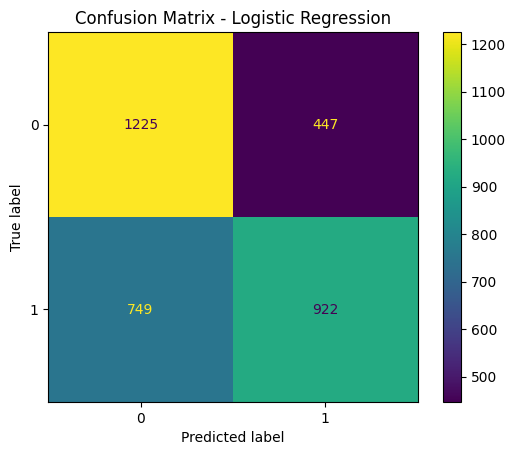

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score
roc_scores = {
    "Logistic Regression": roc_auc_score(
        y_test, lr.predict_proba(X_test_scaled)[:, 1]
    ),
    "Decision Tree": roc_auc_score(
        y_test, dt.predict_proba(X_test)[:, 1]
    ),
    "Random Forest": roc_auc_score(
        y_test, rf.predict_proba(X_test)[:, 1]
    ),
    "SVM": roc_auc_score(
        y_test, svm.predict_proba(X_test_scaled)[:, 1]
    ),
    "KNN": roc_auc_score(
        y_test, knn.predict_proba(X_test_scaled)[:, 1]
    )
}


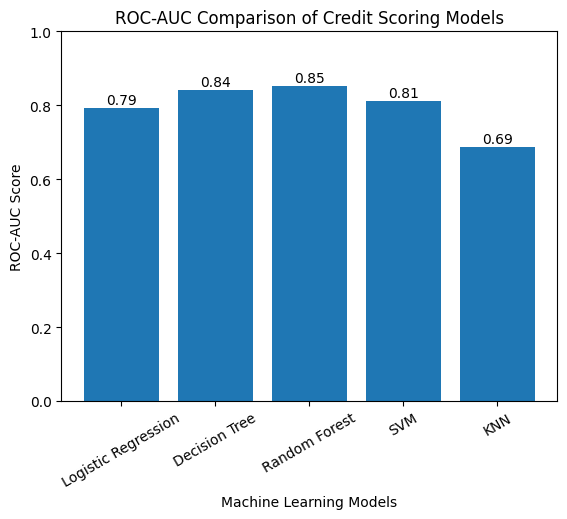

In [ ]:
import matplotlib.pyplot as plt

models = list(roc_scores.keys())
scores = list(roc_scores.values())

plt.figure()
plt.bar(models, scores)
plt.xlabel("Machine Learning Models")
plt.ylabel("ROC-AUC Score")
plt.title("ROC-AUC Comparison of Credit Scoring Models")
plt.ylim(0, 1)

# Add value labels on bars
for i, score in enumerate(scores):
    plt.text(i, score + 0.01, f"{score:.2f}", ha='center')

plt.xticks(rotation=30)
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_roc(y_test, y_prob, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()


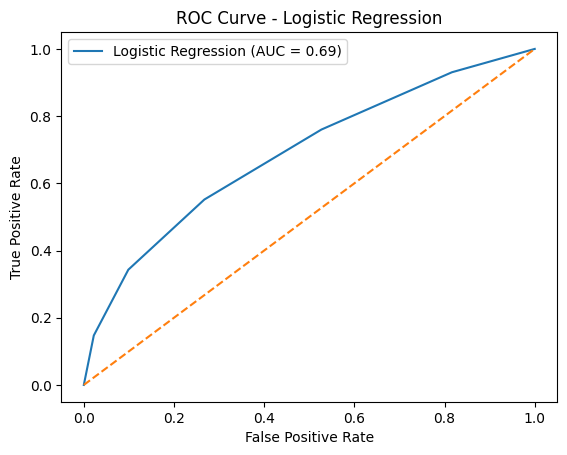

In [ ]:
plot_roc(y_test, y_prob, "Logistic Regression")
